# Business Understanding
Briefly restate the project’s purpose and goals.

Define the research/prediction question (e.g., “Can we predict a job’s salary based on location, company, and job title?”).

Describe why the problem is important or useful.

### Data Preview
- Here, we will give a preview of what the original csv data looks like before we apply feature engineering to it.

In [2]:
# Preview
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from dotenv import load_dotenv
import os

load_dotenv()

csv_path = os.getenv("CSV_PATHNAME") # To avoid conflicts with different pathnames

# Load data
data = pd.read_csv(csv_path)

data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [3]:
# Describe all fields in the data
data.info()
data.head()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
         work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.519470   6

# Data Cleaning

### Handling Missing Data

In [4]:
# Print all fields and sum of any missing values in their respective column
print("Missing Values:")
data.isnull().sum()

Missing Values:


work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

#### Conclusion
- In the untouched dataset, there are absolutely no missing values at all. So there is no need to create any code for accounting for missing values in the dataset

# Data Exploration
- This step will now go through the univariate, bivariate, and multivariate analysis of our cleaned dataset

### Univariate Analysis

In [5]:
# Describe data again to remind ourselves
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355.000000,9355,9355,9355,9355.000000,9355.000000,9355,9355,9355,9355,9355,9355
unique,NaN,125,10,11,NaN,NaN,83,4,4,3,70,3
top,NaN,Data Engineer,Data Science and Research,USD,NaN,NaN,United States,Senior,Full-time,In-person,United States,M
freq,NaN,2195,3014,8591,NaN,NaN,8086,6709,9310,5730,8132,8448
mean,2022.760449,NaN,NaN,NaN,149927.981293,150299.495564,NaN,NaN,NaN,NaN,NaN,NaN
std,0.519470,NaN,NaN,NaN,63608.835387,63177.372024,NaN,NaN,NaN,NaN,NaN,NaN
min,2020.000000,NaN,NaN,NaN,14000.000000,15000.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2023.000000,NaN,NaN,NaN,105200.000000,105700.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2023.000000,NaN,NaN,NaN,143860.000000,143000.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,187000.000000,186723.000000,NaN,NaN,NaN,NaN,NaN,NaN


There are 3 numeric columns to perform univariate analysis on. They are:
1. work_year
2. salary
3. salary_in_usd

The rest of the columns are all categorical values. They are:
1. job_title
2. job_category
3. salary_currency
4. employee_residence
5. experience_level
6. employment_type
7. work_setting
8. company_location
9. company_size

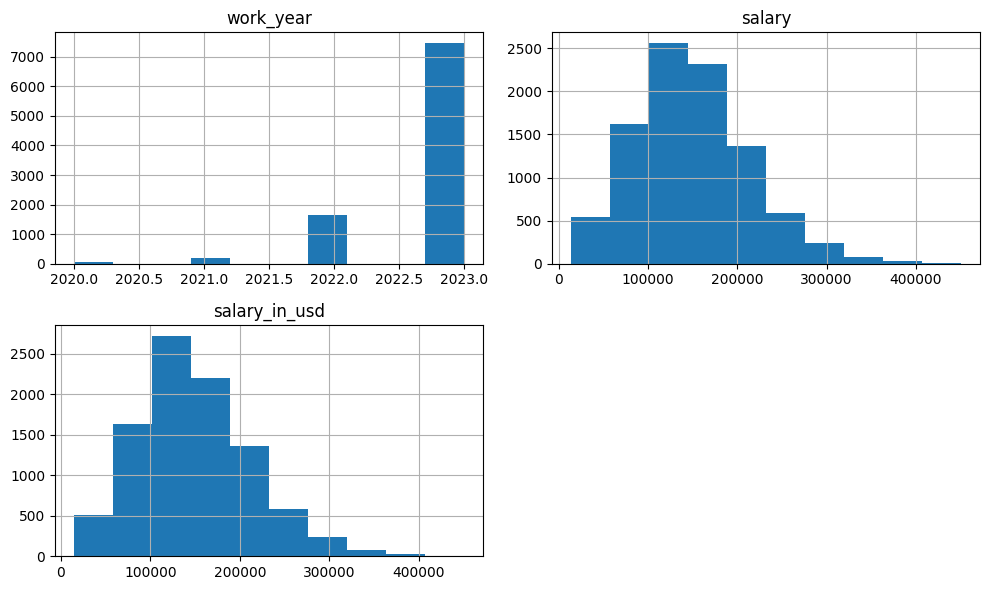

In [6]:
# Histogram of numeric columns
numeric_cols = ['work_year', 'salary', 'salary_in_usd']

data[numeric_cols].hist(figsize=(10,6))
plt.tight_layout()
plt.show()

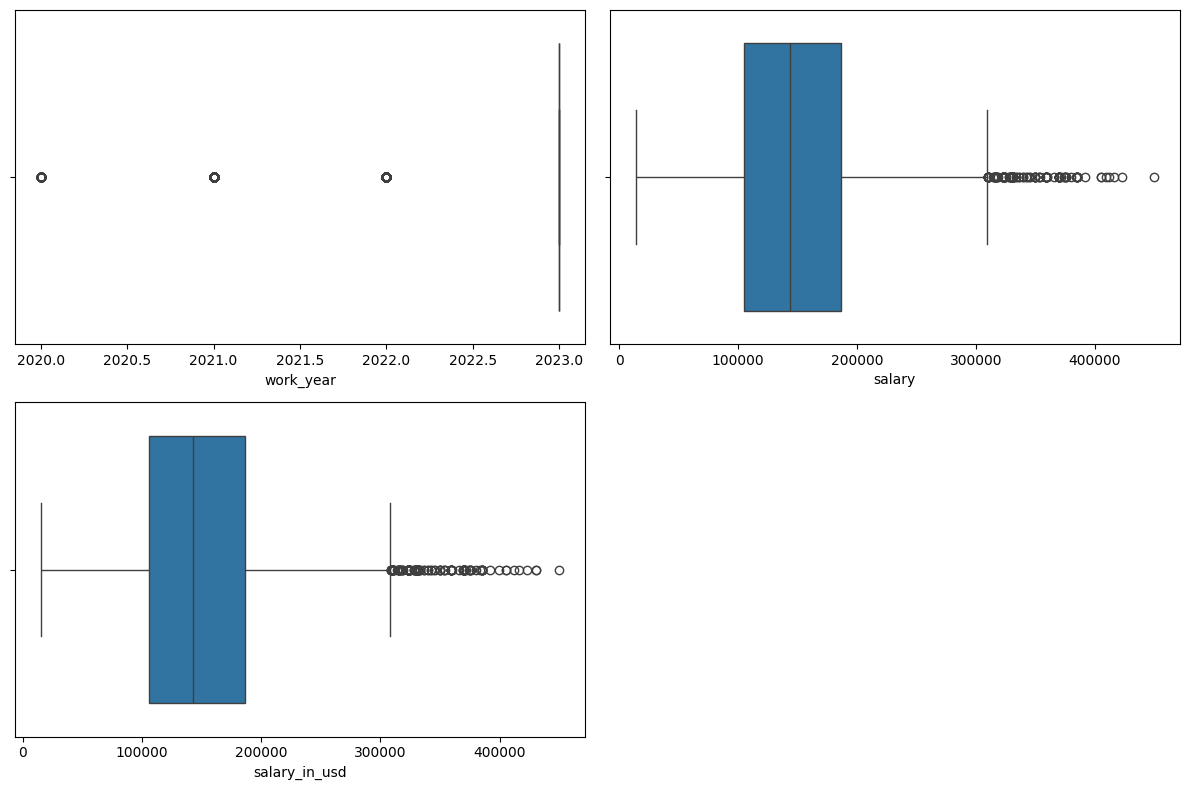

In [60]:
# Boxplots of numeric columns
plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])

plt.tight_layout()
plt.show()

In [8]:
# Categorical columns analysis
categorical_cols = ['job_title', 'job_category', 'salary_currency', 'employee_residence',
            'experience_level', 'employment_type', 'work_setting',
            'company_location', 'company_size']

# Print all unique values and their count
for column in categorical_cols:
    print(f"--------------- {column} ---------------")
    print(data[column].value_counts())
    print()

--------------- job_title ---------------
job_title
Data Engineer                2195
Data Scientist               1989
Data Analyst                 1388
Machine Learning Engineer     991
Applied Scientist             272
                             ... 
Deep Learning Researcher        1
Manager Data Management         1
Marketing Data Engineer         1
Data Science Tech Lead          1
Cloud Data Architect            1
Name: count, Length: 125, dtype: int64

--------------- job_category ---------------
job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64

--------------- salary_currency ---------------
salary_curr

In [9]:
# Get fields with few unique values (< 15)
columns_to_plot = []
for column in categorical_cols:
    unique_count = data[column].nunique()
    if unique_count <= 15:
        columns_to_plot.append(column)

print(columns_to_plot)

['job_category', 'salary_currency', 'experience_level', 'employment_type', 'work_setting', 'company_size']


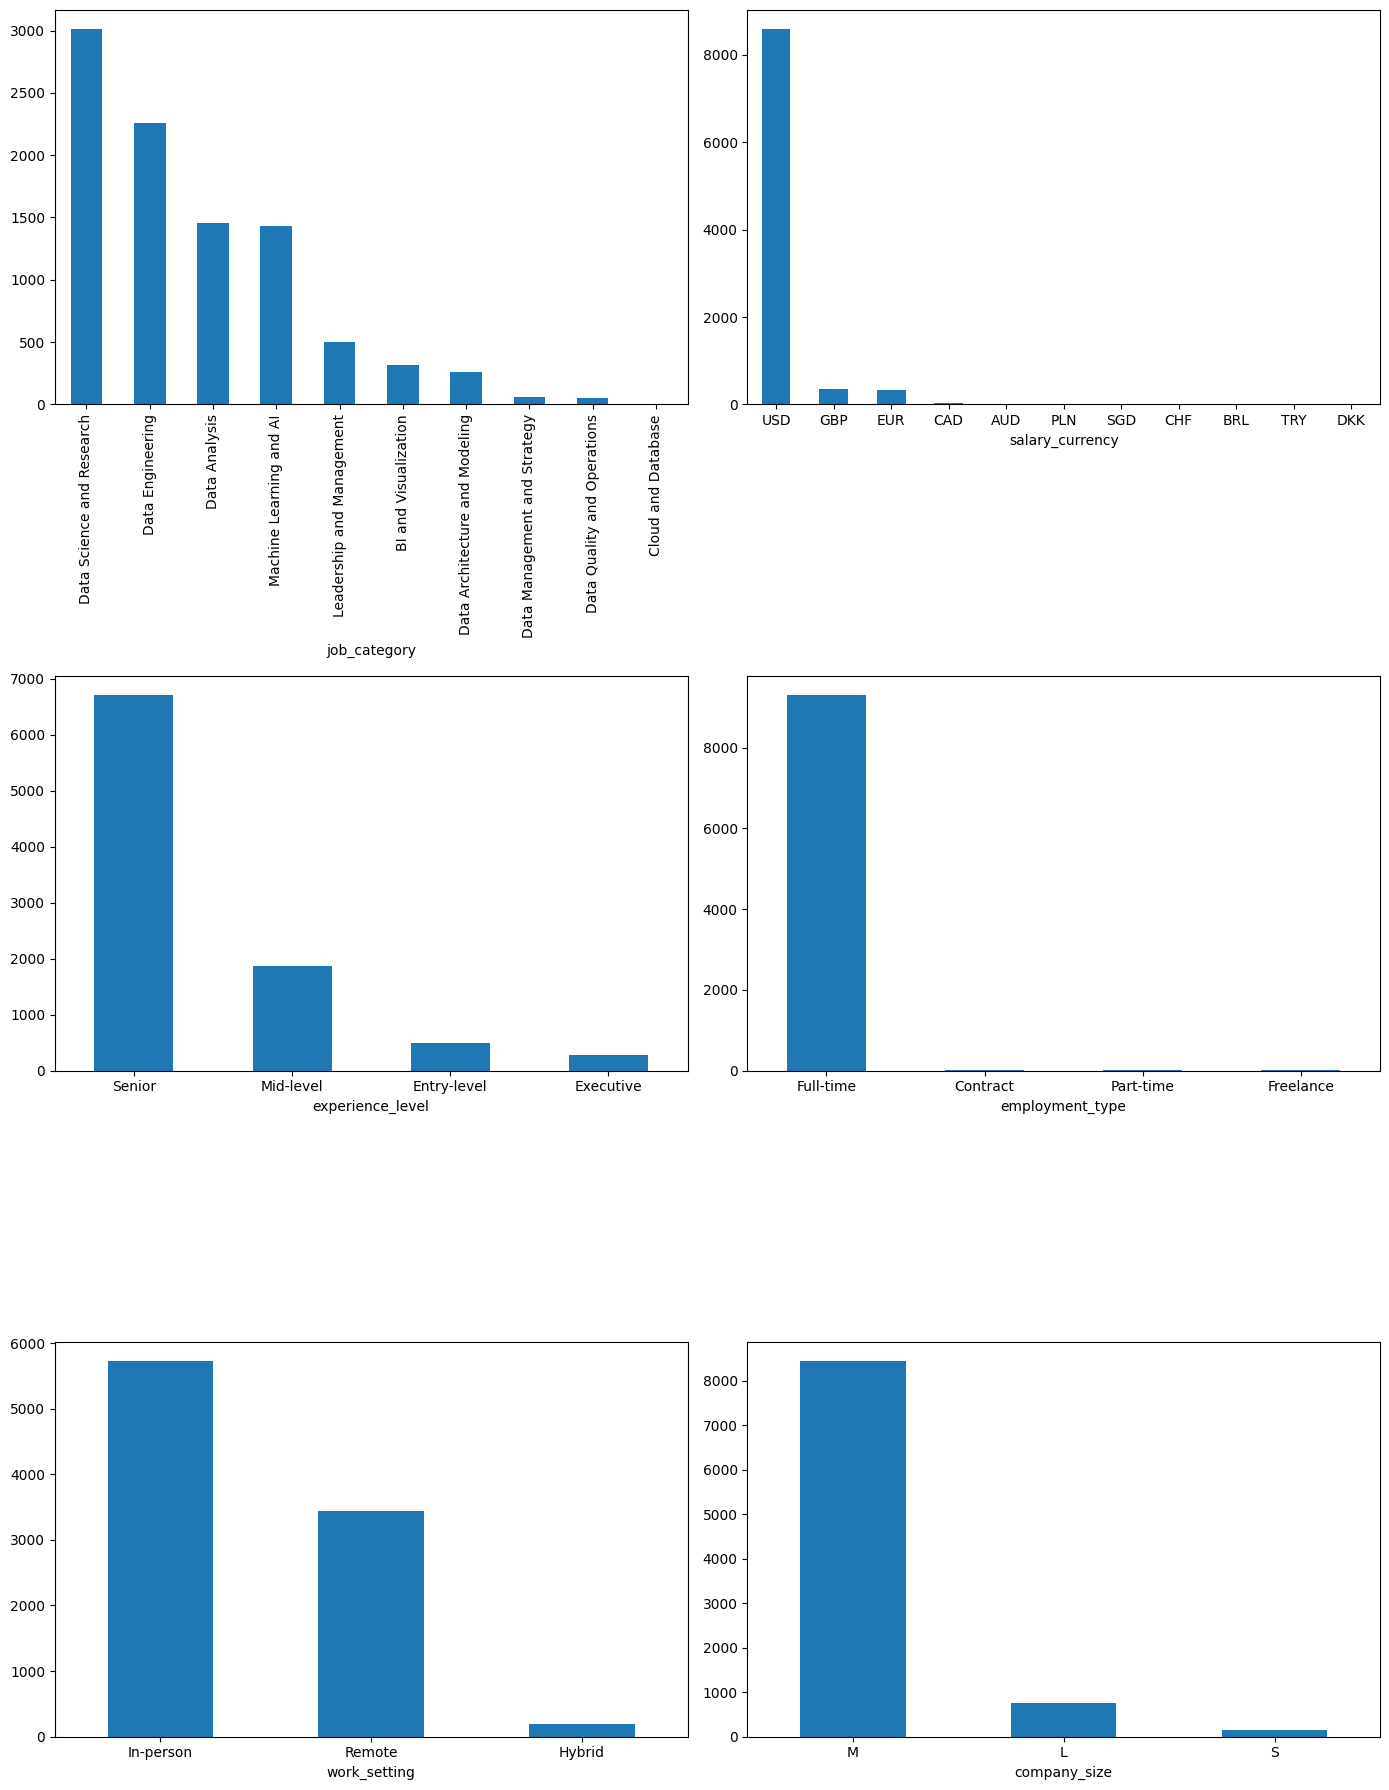

In [61]:
plt.figure(figsize=(14,18))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    data[column].value_counts().plot(kind='bar')
    if column == "job_category":
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Salary vs. Categorical columns

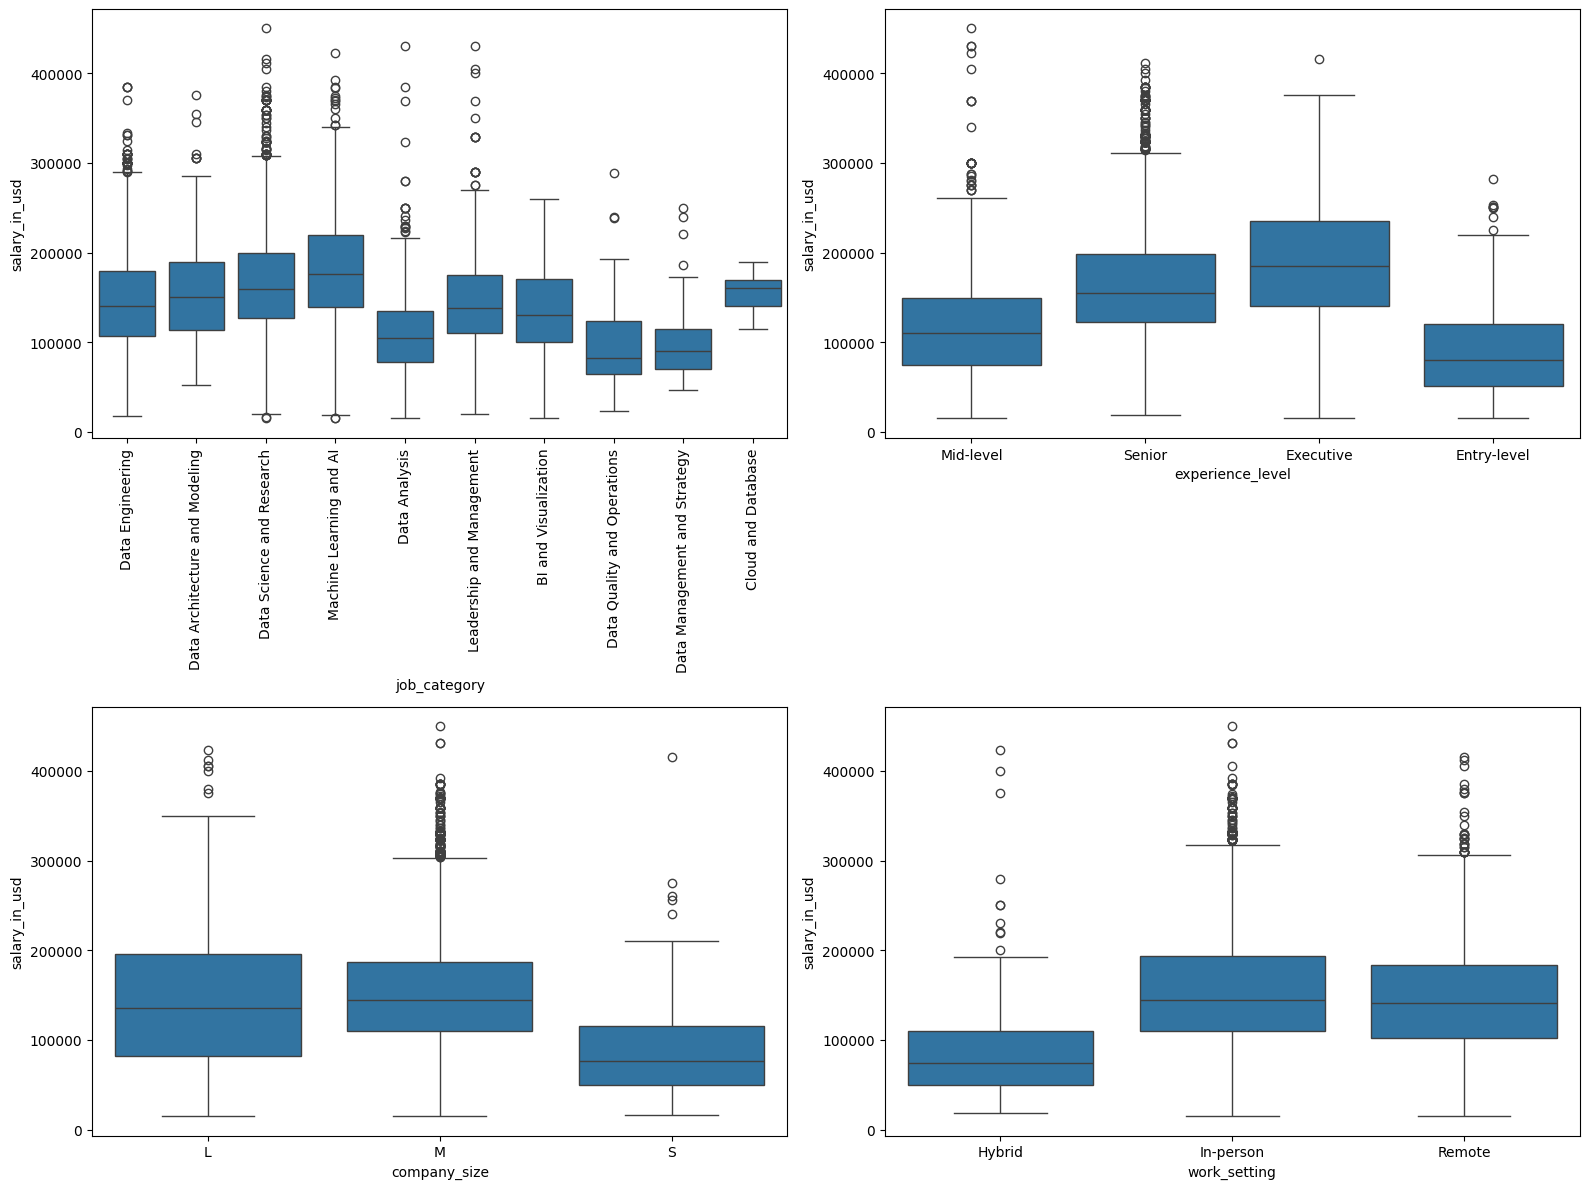

In [67]:
# Compare salary against every categorical category, except job_title and company_location
categorical_cols = ['job_category', 'experience_level', 'company_size', 'work_setting']

plt.figure(figsize=(16, 12)) 

for i, column in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(x=column, y='salary_in_usd', data=data)
    
    if column == "job_category":
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#### Salary vs. Numerical columns

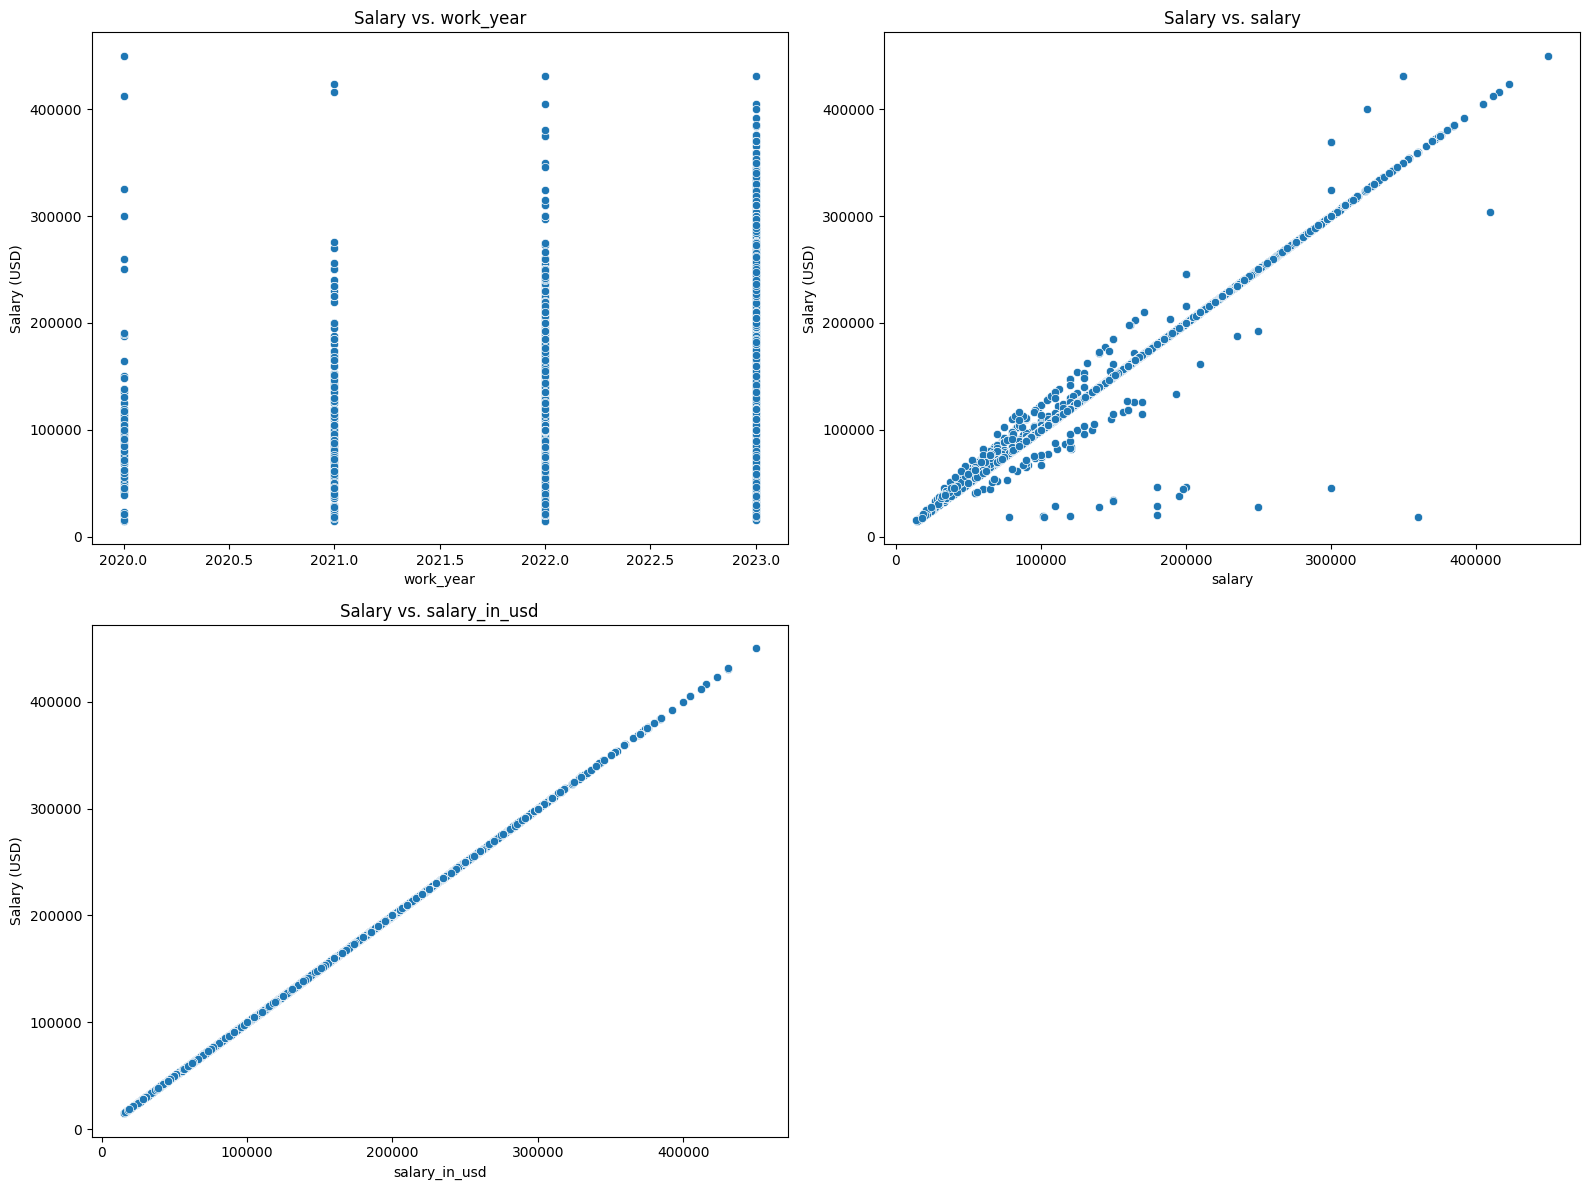

In [70]:
plt.figure(figsize=(16, 12)) 

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)  
    
    # 1. Use a Scatter Plot for Numeric vs. Numeric
    sns.scatterplot(x=column, y='salary_in_usd', data=data)
    
    plt.title(f'Salary vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Salary (USD)')
    
    # Rotation is less critical for numeric axes but harmless
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Multivariate Analysis

# Feature Engineering

### Response variable
- For the dataset we are using, we will be building a prediction model for the salary_in_usd field

### Variable Selection and Creation

In [ ]:
# Step 2: Drop variables not useful for modeling 
data.drop(['salary_currency', 'job_title', 'salary', 'employee_residence'], axis=1, inplace=True)

# Step 3: Construct New Variables

# make 'company_location' categorical with top 6 locations, rest as 'Other'
top_6 = data['company_location'].value_counts().nlargest(6).index

data['company_location'] = np.where(data['company_location'].isin(top_6),
                                    data['company_location'],
                                    'Other')

# Convert all categorical columns to numeric codes
categorical_cols = ['company_location', 'job_category', 'experience_level', 
                    'employment_type', 'work_setting', 'company_size']

for col in categorical_cols:
    data[col + '_code'] = data[col].astype('category').cat.codes

# drop original categorical columns
data_numeric = data.drop(columns=categorical_cols)

# Check result
data_numeric.head()

# Step 4: Scale Data if required


,work_year,salary_in_usd,company_location_code,job_category_code,experience_level_code,employment_type_code,work_setting_code,company_size_code
0,2023,95012,2,4,2,2,0,0
1,2023,186000,6,3,3,2,1,1
2,2023,81800,6,3,3,2,1,1
3,2023,212000,6,7,3,2,1,1
4,2023,93300,6,7,3,2,1,1


Then explain why we created/removed some

### Importance and Multicolinearity

                       work_year  salary_in_usd  company_location_code  \
work_year               1.000000       0.166003               0.182609   
salary_in_usd           0.166003       1.000000               0.223684   
company_location_code   0.182609       0.223684               1.000000   
job_category_code       0.010970       0.295061              -0.041604   
experience_level_code   0.144390       0.281472               0.141378   
employment_type_code    0.043098       0.015168               0.027217   
work_setting_code      -0.068513      -0.021230               0.020757   
company_size_code       0.112634      -0.014439               0.037594   

                       job_category_code  experience_level_code  \
work_year                       0.010970               0.144390   
salary_in_usd                   0.295061               0.281472   
company_location_code          -0.041604               0.141378   
job_category_code               1.000000               0.053191  

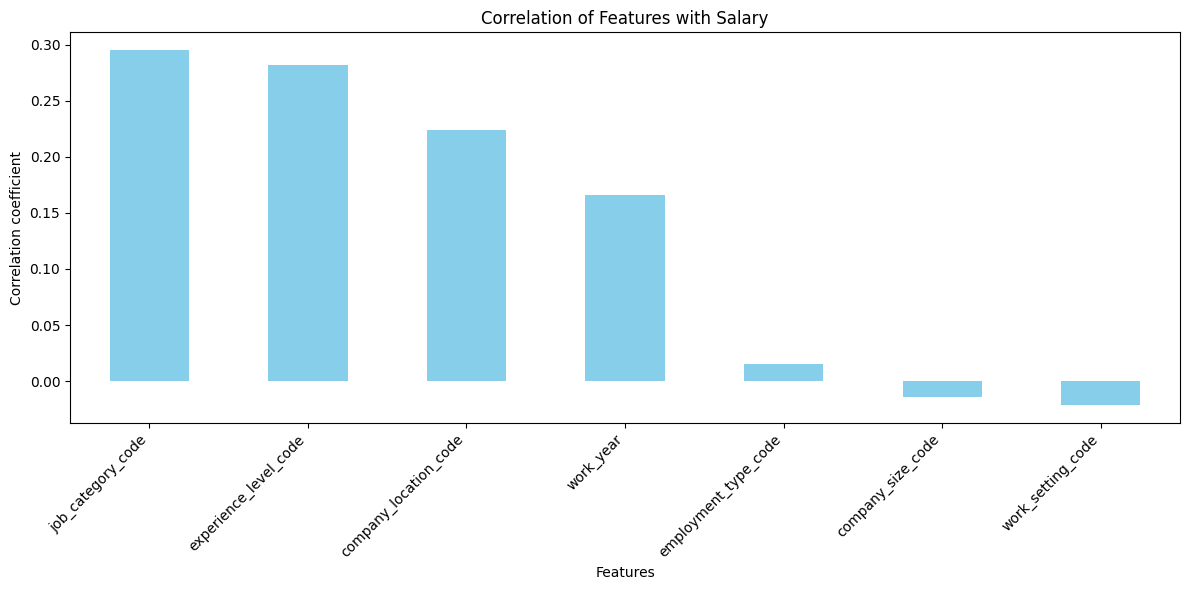

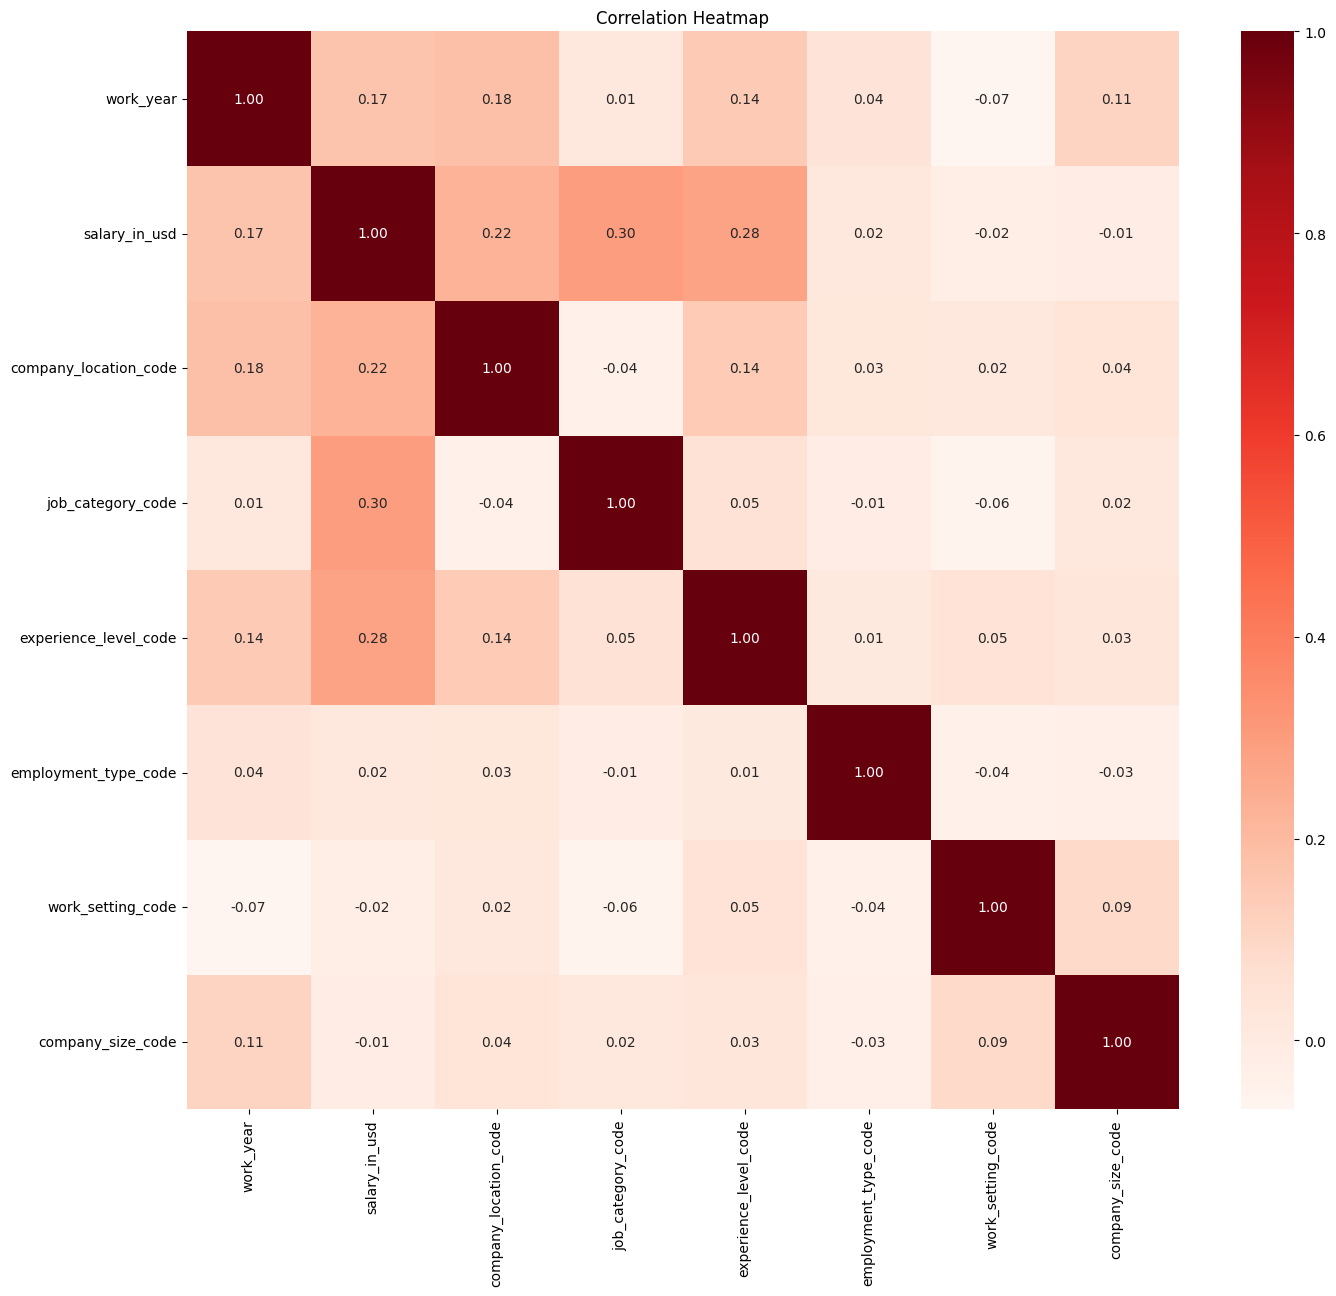

In [ ]:
# Step 5: Importance & Multicolinearity 

# Correlation matrix for all numeric features
corrVals = data_numeric.corr()
print(corrVals)

# Compute correlation with target (salary_in_usd)
target_corr = data_numeric.corr()['salary_in_usd'].drop('salary_in_usd')  # drop self-correlation

# Sort correlations
target_corr = target_corr.sort_values(ascending=False)

# Plot as bar chart
plt.figure(figsize=(12,6))
target_corr.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Salary")
plt.ylabel("Correlation coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Correlations
plt.figure(figsize=(16, 14))
sns.heatmap(data_numeric.corr(), annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# drop if too similar to other variables
# data_numeric.drop('TaxPaid', axis = 1, inplace = True)

Then explain output

# Predictive Modelling
State what we will use. Best to follow notes

# Findings
Summarize main results and conclusions.

Highlight key visualizations that support findings.

Connect insights back to your original business question.

Discuss limitations and possible improvements.

Probably best to split above 4 into 4 separate blocks

# Team Contributions

### Theo's Contributions
- Provided basic code to extract data from Jobs.ie and export it to a csv file
- Created initial template for both DataMining and DataAnalyses files 
- Found appropriate dataset on Kaggle
- Carried out univariate, bivariate and multivariate analysis of dataset

### Oisín's Contributions
- Created README.md file to explain project
- Researched potential websites to use for project
- Completed Feature engineering for project